# Olympics Data Analysis & Machine Learning **Solution**

Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Dataset

In [ ]:
df = pd.read_csv('athlete_events.csv')   # example Olympics dataset
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Basic Data Understanding

In [ ]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Data Cleaning & Preprocessing

Handle Missing Values

In [ ]:
df.isnull().sum()
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)

/tmp/ipython-input-950727764.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-950727764.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Feature Selection

In [ ]:
medal_df = df[df['Medal'].notnull()]
medal_df = medal_df[['Team', 'Year', 'Medal']]
medal_df.head()

,Team,Year,Medal
3,Denmark/Sweden,1900,Gold
37,Finland,1920,Bronze
38,Finland,1920,Bronze
40,Finland,2014,Bronze
41,Finland,1948,Bronze


Feature Engineering

Convert Medal to Numerical Value

In [ ]:
medal_map = {'Gold': 3, 'Silver': 2, 'Bronze': 1}
medal_df['Medal_Value'] = medal_df['Medal'].map(medal_map)

Aggregate Data (Country-Year Level)

In [ ]:
final_df = medal_df.groupby(['Team', 'Year']).sum().reset_index()
final_df.head()

,Team,Year,Medal,Medal_Value
0,A North American Team,1900,BronzeBronzeBronzeBronze,4
1,Afghanistan,2008,Bronze,1
2,Afghanistan,2012,Bronze,1
3,Algeria,1984,BronzeBronze,2
4,Algeria,1992,GoldBronze,4


Exploratory Data Analysis (EDA)

Top Countries by Total Medal Score

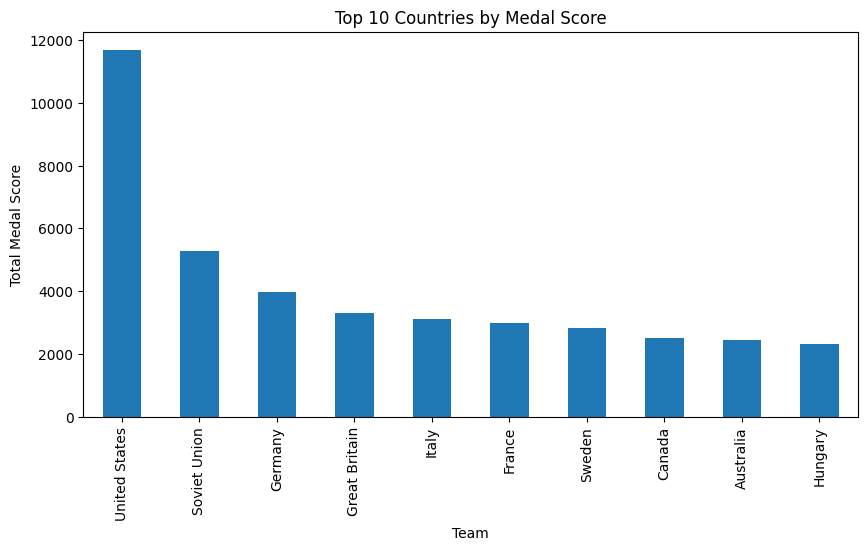

In [ ]:
top_countries = final_df.groupby('Team')['Medal_Value'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries by Medal Score")
plt.ylabel("Total Medal Score")
plt.show()

Encode Categorical Data

In [ ]:
le = LabelEncoder()
final_df['Team_encoded'] = le.fit_transform(final_df['Team'])

Train-Test Split

In [ ]:
X = final_df[['Team_encoded', 'Year']]
y = final_df['Medal_Value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Model Building

In [ ]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

Model Prediction

In [ ]:
y_pred = model.predict(X_test)

Model Evaluation

In [ ]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 27.78803970223325
MSE: 2660.7589858560796
RMSE: 51.58254536038407
R2 Score: 0.4262356612706034


Actual vs Predicted Visualization

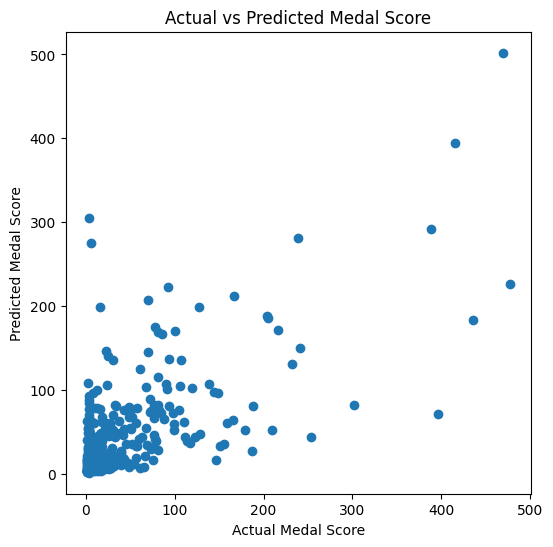

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Medal Score")
plt.ylabel("Predicted Medal Score")
plt.title("Actual vs Predicted Medal Score")
plt.show()